# A0.4 Damped vibration - indirect method
by H cyan

huangzw29@mail2.sysu.edu.cn

2021.4.23

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.interpolate import Rbf
from scipy.optimize import curve_fit
from scipy import fftpack

## EXP1 Damping vibration of the steel rule

## Original curve

In [26]:
df = pd.read_csv(r'Steel_rule_data\Raw Data140.csv')
df.drop(df.head(100).index, inplace=True)
df['Time (s)'] = df['Time (s)'] - df.iloc[0,0]
df.reset_index(drop=True, inplace=True)
df.head(10)

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.000000,-0.696682,-0.191056,-8.458036,8.488831
1,0.019316,-1.348124,0.162585,-13.946926,14.012873
2,0.038633,0.146442,0.310579,-6.505587,6.514643
3,0.057974,1.206787,-0.224455,7.933290,8.027689
4,0.077291,1.193879,-0.281025,13.925352,13.979262
5,0.096612,1.020894,0.278781,6.800951,6.882795
6,0.115954,0.337313,0.004206,-0.055674,0.341903
7,0.135271,-0.701936,-0.143966,-8.689568,8.719061
8,0.154587,-1.258423,0.227546,-13.306881,13.368189
9,0.173904,0.156536,0.279367,-5.605710,5.614849


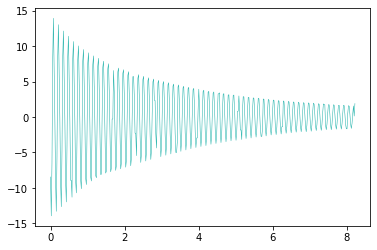

In [27]:
t_origin = np.array(df['Time (s)'])
a_origin = np.array(df['Linear Acceleration z (m/s^2)'])
plt.plot(t_origin, a_origin, linewidth=0.5, color='lightseagreen')

## Caculate the period of vibration

### Interpolation

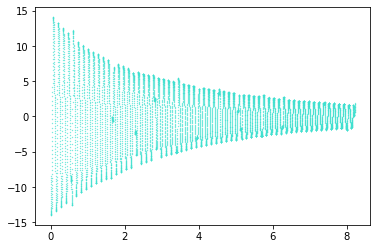

In [28]:
t_itp = np.linspace(t_origin.min(), t_origin.max(), 10000)
func_itp = Rbf(t_origin, a_origin)
a_itp = func_itp(t_itp)
# plt.plot(t_itp, a_itp, color='lightseagreen',linewidth=0.5)
plt.scatter(t_itp, a_itp, color='turquoise', s=0.1)

### Find the zero point and caculate the distance

In [29]:
zeropoint_rough=[]

for i in a_itp:
    if i >= -0.2 and i <= 0.2:
        zeropoint_rough.append(t_itp[a_itp.tolist().index(i)])

delta_t = np.diff(np.array(zeropoint_rough))
delta_t = np.array(list(filter(lambda x: x >= 0.01, delta_t)))
print(delta_t, len(delta_t))

[0.06571214 0.06899775 0.1347099  0.06489074 0.06981915 0.07146196
 0.06324794 0.06489074 0.06981915 0.06406934 0.06981915 0.06489074
 0.06981915 0.06489074 0.06981915 0.06406934 0.06899775 0.06489074
 0.06981915 0.06489074 0.06981915 0.06571214 0.01396383 0.04846271
 0.06489074 0.06981915 0.06406934 0.07064055 0.06489074 0.06981915
 0.06406934 0.06817635 0.06735495 0.06899775 0.06489074 0.06981915
 0.06406934 0.06899775 0.06406934 0.0895328  0.0443557  0.06899775
 0.06406934 0.06899775 0.06406934 0.06981915 0.06406934 0.06899775
 0.07721177 0.05749813 0.06406934 0.06899775 0.06406934 0.06817635
 0.06406934 0.06899775 0.08378298 0.04846271 0.06489074 0.06899775
 0.06406934 0.06817635 0.06406934 0.06817635 0.06406934 0.07474756
 0.05914093 0.06817635 0.06324794 0.06817635 0.06406934 0.06735495
 0.06078373 0.06817635 0.06735495 0.06653355 0.06406934 0.06735495
 0.06324794 0.06817635 0.06406934 0.06735495 0.07721177 0.05503392
 0.06242654 0.06735495 0.06324794 0.06735495 0.06324794 0.0673

### Filter

In [30]:
t_mean = np.mean(delta_t)
t_sigma = np.std(delta_t, ddof = 1)

delta_t = np.array(list(filter(lambda x: x <= (t_mean + 3*t_sigma) and x >= (t_mean - 3*t_sigma), delta_t)))
print(delta_t, len(delta_t))

[0.06571214 0.06899775 0.06489074 0.06981915 0.07146196 0.06324794
 0.06489074 0.06981915 0.06406934 0.06981915 0.06489074 0.06981915
 0.06489074 0.06981915 0.06406934 0.06899775 0.06489074 0.06981915
 0.06489074 0.06981915 0.06571214 0.04846271 0.06489074 0.06981915
 0.06406934 0.07064055 0.06489074 0.06981915 0.06406934 0.06817635
 0.06735495 0.06899775 0.06489074 0.06981915 0.06406934 0.06899775
 0.06406934 0.0895328  0.0443557  0.06899775 0.06406934 0.06899775
 0.06406934 0.06981915 0.06406934 0.06899775 0.07721177 0.05749813
 0.06406934 0.06899775 0.06406934 0.06817635 0.06406934 0.06899775
 0.08378298 0.04846271 0.06489074 0.06899775 0.06406934 0.06817635
 0.06406934 0.06817635 0.06406934 0.07474756 0.05914093 0.06817635
 0.06324794 0.06817635 0.06406934 0.06735495 0.06078373 0.06817635
 0.06735495 0.06653355 0.06406934 0.06735495 0.06324794 0.06817635
 0.06406934 0.06735495 0.07721177 0.05503392 0.06242654 0.06735495
 0.06324794 0.06735495 0.06324794 0.06735495 0.07803317 0.0533

### Output

In [31]:
t = 2*np.mean(delta_t)
omega = 2*np.pi/t
print(t)
print(omega)

0.13124330139920934
47.874331414962704


## Caculate the damped exponential

### Hilbert transform

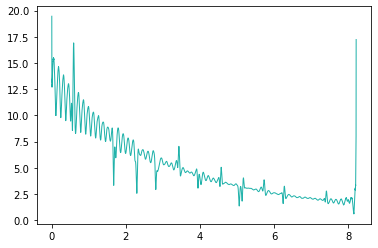

In [32]:
ha = fftpack.hilbert(a_itp)
a_env = np.sqrt(a_itp**2 + ha**2)
plt.plot(t_itp, a_env, color='lightseagreen', linewidth=1, label=u"Envelop")

### Curve fitting

12.831779579825243 0.27698589852746813


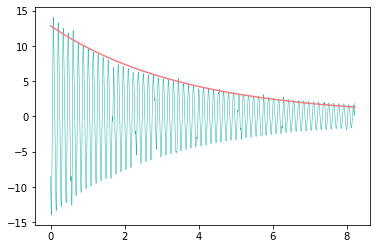

In [33]:
def env(t, a, beta):
    return a*np.exp(-beta*t)

popt, pcov = curve_fit(env, t_itp, a_env)
avals = env(t_itp, popt[0], popt[1])

plt.plot(t_itp, a_itp, color='lightseagreen',linewidth=0.5)
plt.plot(t_itp, avals, color='lightcoral')

a = popt[0]
beta = popt[1]
print(a,beta)

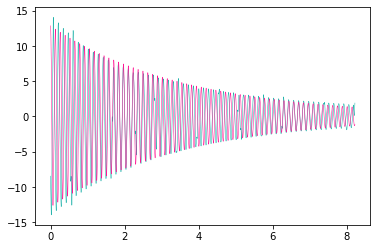

In [34]:
fit = a * np.exp(-beta*t_itp) * np.cos(omega*t_itp)
plt.plot(t_itp, a_itp, color='lightseagreen',linewidth=0.5)
plt.plot(t_itp, fit, color='deeppink', linewidth=0.5)

## Subplot

Text(0.5, 0.01, 'Fig.2 Direct Fitting. L=140mm')

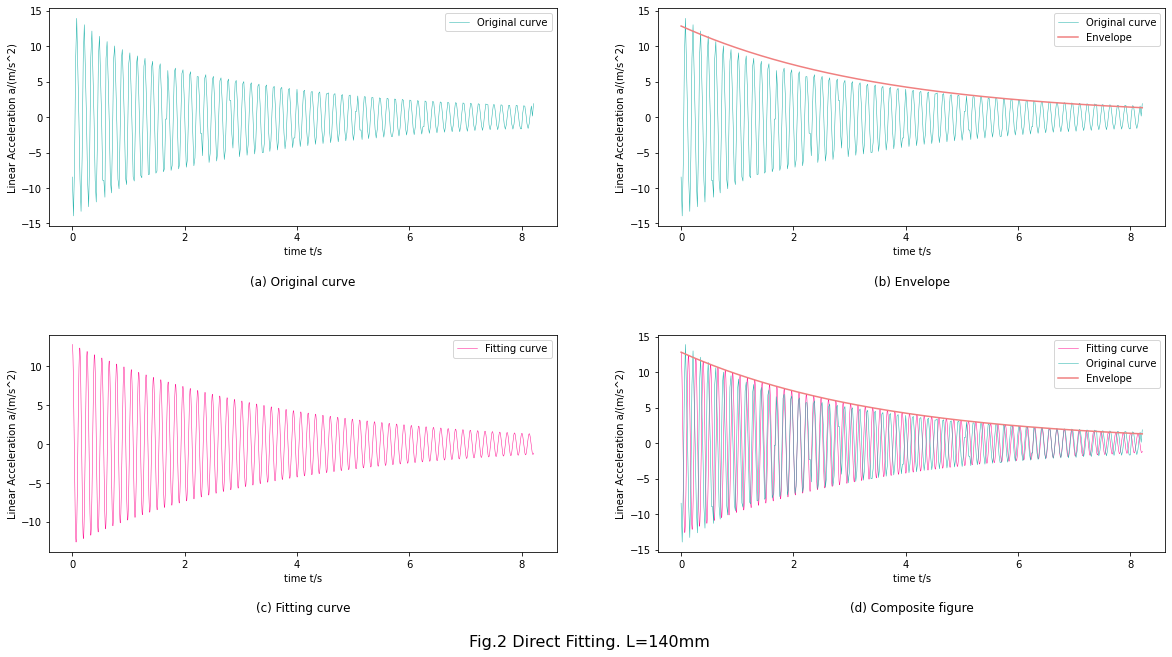

In [38]:
fig, a =  plt.subplots(2,2,figsize=(20, 10))


a[0][0].plot(t_origin, a_origin, linewidth=0.5, color='lightseagreen', label='Original curve')

a[0][0].set_xlabel('time t/s')
a[0][0].set_ylabel('Linear Acceleration a/(m/s^2)')
a[0][0].set_title('(a) Original curve', y=-0.3)
a[0][0].legend()


a[0][1].plot(t_origin, a_origin, linewidth=0.5, color='lightseagreen', label='Original curve')
a[0][1].plot(t_itp, avals, color='lightcoral', label='Envelope')

a[0][1].set_xlabel('time t/s')
a[0][1].set_ylabel('Linear Acceleration a/(m/s^2)')
a[0][1].set_title('(b) Envelope', y=-0.3)
a[0][1].legend()


a[1][0].plot(t_itp, fit, color='deeppink', linewidth=0.5, label='Fitting curve')

a[1][0].set_xlabel('time t/s')
a[1][0].set_ylabel('Linear Acceleration a/(m/s^2)')
a[1][0].set_title('(c) Fitting curve', y=-0.3)
a[1][0].legend()


a[1][1].plot(t_itp, fit, color='deeppink', linewidth=0.5, label='Fitting curve')
a[1][1].plot(t_origin, a_origin, linewidth=0.5, color='lightseagreen', label='Original curve')
a[1][1].plot(t_itp, avals, color='lightcoral', label='Envelope')

a[1][1].set_xlabel('time t/s')
a[1][1].set_ylabel('Linear Acceleration a/(m/s^2)')
a[1][1].set_title('(d) Composite figure', y=-0.3)
a[1][1].legend()


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)

plt.suptitle('Fig.{} Direct Fitting. L={}mm'.format(2, 140), y=0.01, fontsize=16)
